In [1]:
import torch

# forbide video card
torch.cuda.is_available = lambda: False

import glob
import os

from model import SARModel
from dataset import SARdataset
import albumentations as A

import lightning as L
import os
import glob

from model import SARModel
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm
import cv2


project_p = "/home/ao/Desktop/ieee/"
train_data_p = project_p + "data/Track1/train/images/"
train_label_p = project_p + "data/Track1/train/labels/"
test_data_p = project_p + "data/Track1/val/images/"


dev_data_p = project_p + "data/dev/p1"

batch_size = 8

if __name__ == "__main__":
    # img_l = glob.glob(os.path.join(train_data_p, '*.tif'))
    img_l = glob.glob(os.path.join(dev_data_p, "*.tif"))
    # label_l = glob.glob(os.path.join(train_label_p, '*.png'))
    img_l.sort()

/home/ao/anaconda3/envs/kaggle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-02-18 00:15:25.537663: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-18 00:15:25.559658: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 00:15:25.559680: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 00:15:25.

In [2]:
# ! rm -f sub.zip
# ! rm -f /home/ao/Desktop/ieee/rubbish/sub/*
# # ! mv "*_msk.png" sub
# ! mv *.png sub

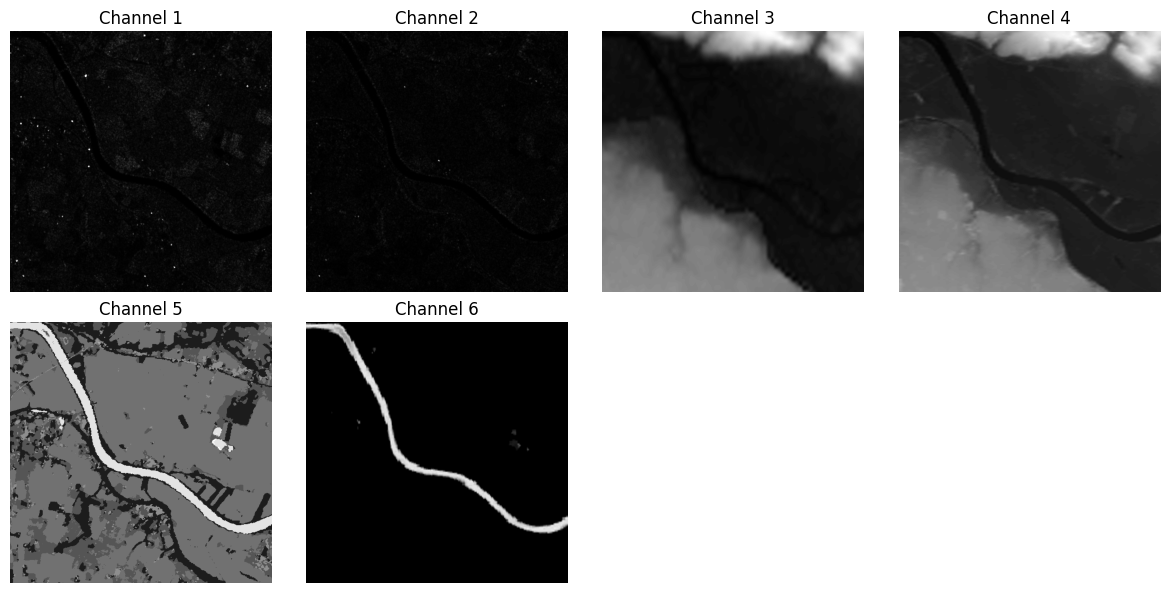

In [3]:
from tool import *

show_tiff_id(0, img_l, power=True)

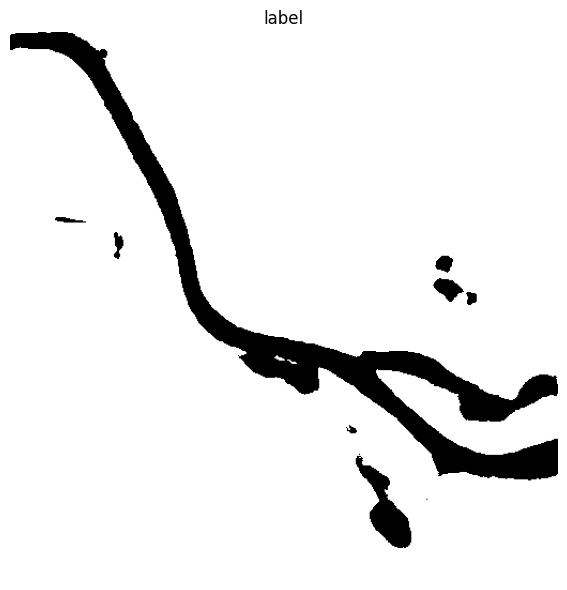

In [4]:
t = cv2.imread("/home/ao/Desktop/ieee/rubbish/sub/1631_msk.png")
show_label(t)

In [5]:
from train import *

Seed set to 42


In [6]:
img_l = glob.glob(os.path.join(train_data_p, "*.tif"))
label_l = glob.glob(os.path.join(train_label_p, "*.png"))

img_l.sort()
label_l.sort()

# img_l = [train_data_p + f"{i}.tif" for i in range(img_num)]
# label_l = [project_p + f"data/Track1/train/labels/{i}.png" for i in range(img_num)]
tt_dataset = SARdataset(img_l, label_l, mode="train", normal=True)
tv_dataset = SARdataset(img_l, label_l, mode="train", normal=True)


# train_set, val_set = build_dataset(dataset, val_rate)

tt_dataset.transform = train_trans
tv_dataset.transform = test_trans

# train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=os.cpu_count()-1)
# val_loader = DataLoader(val_set, batch_size=batch_size*2, shuffle=False, pin_memory=True, num_workers=os.cpu_count()-1)

# model=SARModel("UnetPlusPlus", encoder_name="timm-resnest101e", in_channels=6, encoder_weights = 'imagenet')
# p=next(iter(train_loader))

In [17]:
from torch.utils.data.dataset import Subset
from sklearn import model_selection

# kf = model_selection.KFold(n_splits=10, shuffle=False)
kf = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)

In [33]:
l = []
for i, j in kf.split(tt_dataset):
    l.append(set(i))

In [39]:
num = 0
for i in range(len(l)):
    if 100 in l[0]:
        num += 1
num

10

In [12]:
p

(array([ 164,  165,  166, ..., 1628, 1629, 1630]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163]))

In [ ]:
train_dataset = Subset(tt_dataset, p[0])
val_dataset = Subset(tv_dataset, p[1])

In [ ]:
tt_dataset[1]

(tensor([[[-0.0558, -0.1917,  0.0085,  ..., -0.1759, -0.1717, -0.3143],
          [-0.3161, -0.4823, -0.2367,  ...,  0.1865,  0.0074, -0.1759],
          [-0.4723, -0.3576, -0.1305,  ...,  0.2995,  0.0332, -0.1180],
          ...,
          [-0.1209, -0.1073,  0.4078,  ...,  0.2748,  0.0750,  0.0804],
          [ 0.1819, -0.3300,  0.7868,  ...,  0.0071,  0.0021, -0.0380],
          [ 0.1311, -0.2678,  0.3131,  ...,  0.1805,  0.2330, -0.0716]],
 
         [[ 0.3382, -0.0348, -0.0066,  ...,  0.5971,  0.7350,  0.1031],
          [-0.1277, -0.1516, -0.0517,  ...,  0.2411,  0.5310,  0.1862],
          [-0.0348, -0.0953, -0.0432,  ..., -0.3148, -0.0137, -0.0038],
          ...,
          [ 0.6590,  0.6182,  0.2481,  ...,  0.1440, -0.0925,  0.0145],
          [ 0.6590,  0.9349,  0.8589,  ..., -0.2853, -0.3092,  0.1017],
          [ 0.4733,  0.2819,  0.8448,  ..., -0.0671, -0.1417,  0.2185]],
 
         [[-0.0041, -0.0041, -0.0041,  ...,  0.0214,  0.0223,  0.0223],
          [-0.0041, -0.0041,

In [43]:
a = torch.randn(5, 5)
b = torch.randn(5, 5)
c = torch.randn(5, 5)

In [49]:
k = [a]
k

[tensor([[-1.3407, -0.5854,  0.5362,  0.5246,  1.1412],
         [ 0.0516,  0.7281, -0.7106, -1.0495, -0.3576],
         [-0.3165,  0.5886, -0.8905,  0.4098, -1.4570],
         [-0.1023, -0.5992,  0.6173, -0.1693,  0.2332],
         [ 4.0356,  1.2795, -0.0127,  0.2408,  0.1325]])]

In [50]:
sum(k) / len(k)

tensor([[-1.3407, -0.5854,  0.5362,  0.5246,  1.1412],
        [ 0.0516,  0.7281, -0.7106, -1.0495, -0.3576],
        [-0.3165,  0.5886, -0.8905,  0.4098, -1.4570],
        [-0.1023, -0.5992,  0.6173, -0.1693,  0.2332],
        [ 4.0356,  1.2795, -0.0127,  0.2408,  0.1325]])

In [51]:
torch.mean(torch.stack(k), dim=0)

tensor([[-1.3407, -0.5854,  0.5362,  0.5246,  1.1412],
        [ 0.0516,  0.7281, -0.7106, -1.0495, -0.3576],
        [-0.3165,  0.5886, -0.8905,  0.4098, -1.4570],
        [-0.1023, -0.5992,  0.6173, -0.1693,  0.2332],
        [ 4.0356,  1.2795, -0.0127,  0.2408,  0.1325]])